<img src="Images/Ballenas_logo.jpg">
# BSS Two Unit Cube Satellite Payload Data Analysis
## Camera Pi
This notebook will analyze the data collected from the camera Pi. This computer is running the computational program and the Pi camera which will be recording the flashes of both the light display and the relay.  
### Objective
This is another Pi that will be running multiple programs to determine if it can effectively perform during a rocket launch and flight. It will also be testing the durability of the PiCamera

### Description of Computational Program
To meet the desires of the science team, software devised a computational program that would calculate a set equation while printing the time it took to calculate each iteration. The equation used is 'x^2' where x increases by 1 each time. By choosing an equation for the pi to calculate, it can be easily analyzed by graphing and checking for anomlies. Due to the size of the files and the worry of the memory overfilling, data is written to a new file every five minutes. If the pi turns off during the flight, the data will not overwrite the previous files. 

## Static Test
This static test will be compared to the data we collect from the satellite and serve as a benchmark for the pi to follow.

In [9]:
#import of libraries.
#this cell must be run each time the notebook is started.
import pandas as pd
import numpy as np
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [10]:
# these next fews cells imports the following datafiles from the computational program
data0s = pd.read_csv('Datafiles/CompStatic/calcresults0static.txt')
#data0s.info()
data1s = pd.read_csv('Datafiles/CompStatic/calcresults1static.txt')
#data1s.info()
data2s = pd.read_csv('Datafiles/CompStatic/calcresults2static.txt')
#data2s.info()

In [11]:
datastatic = pd.concat([data0s, data1s, data2s]) # this will combine the three datafiles into one
datastatic.info()
iterationstatic = datastatic['iteration'] # assign data to a variable to be called up later
timestatic = datastatic['time']
resultstatic = datastatic['result']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151485 entries, 0 to 1042819
Data columns (total 3 columns):
iteration    int64
time         float64
result       int64
dtypes: float64(1), int64(2)
memory usage: 96.2 MB


### Static Analysis
The cells below will analyze the data and attempt to find points of failure for the performance of the pi. If points of failure are found, they can be anaylzed in greater depth. The data collected from this pi includes one set of files from the computational program which includes three variables; iteration, time and result. Iteration runs through from 0+ and is plugged in as 'x' into the equation 'x^2'. The result is the answer to this equation and the time is printed for every iteration calculated. The camera footage needs to be incopmressed and can be displayed with a computer that has linux. The data below is from a static test and will be compared to the data from the satellite.

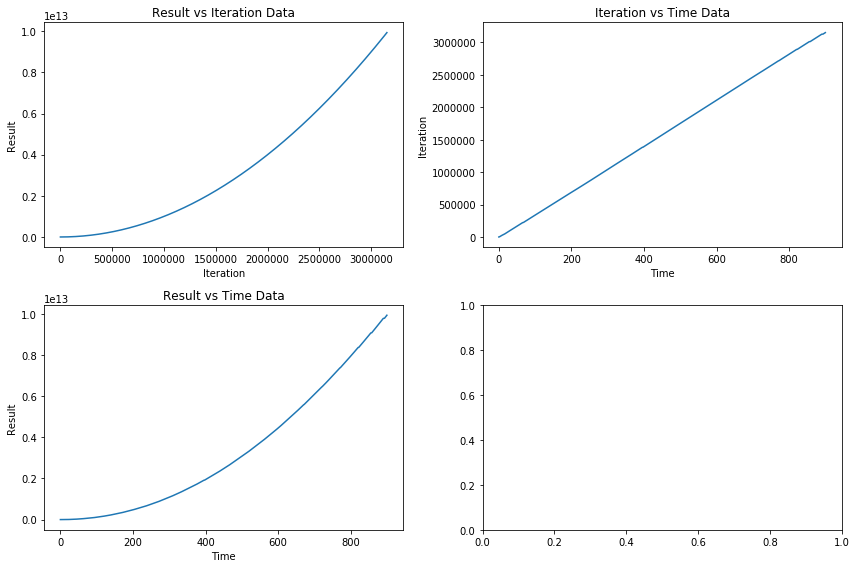

In [12]:
#this cell plots the data as the result as a function of the iteration
fig, ((plot1, plot2), (plot3, plot4))=plt.subplots(2,2, figsize=(12, 8))
plot1.set_xlabel('Iteration')
plot1.set_ylabel('Result')
plot1.set_title('Result vs Iteration Data')
plot1.plot(iterationstatic, resultstatic)

plot2.set_xlabel('Time')
plot2.set_ylabel('Iteration')
plot2.set_title('Iteration vs Time Data')
plot2.plot(timestatic, iterationstatic)   

plot3.set_xlabel('Time')
plot3.set_ylabel('Result')
plot3.set_title('Result vs Time Data')
plot3.plot(timestatic, resultstatic)
      
fig.tight_layout()
plt.show()

In [13]:
# will determine if the program properly calculated the equation by finding the last result and last iteration in the datafile
# and squaring the iteration to see if it equals the result
maxRS = max(resultstatic)
maxIS = max(iterationstatic)
maxTS = max(timestatic)
if max(resultstatic) == (max(iterationstatic)**2):
    print('The program calculated the equation properly.')
else:
    print('Program didnt properly calculate the equation')

The program calculated the equation properly.


In [14]:
# finding the time it took the program to write the amount of iterations
maxminS = maxTS/60
print('It took',maxTS,'seconds or',maxminS,'minutes to calculate ', maxIS,'iterations.')

It took 900.000367403 seconds or 15.0000061234 minutes to calculate  3151484 iterations.


## Computational Program Analysis From Satellite
The cells below will upload the files and analyze the data collected while also comparing it to the static test. Unforunately no computational data was collected from the satellite from this raspberry pi. The satellite reached a heat above 40 degrees C and the extreme heat could have caused the pi to malfunction. The code below is commented out. 

In [15]:
# these next fews cells imports the following datafiles from the computational program
#change the location name of the file folder
#add/remove however many files there is

#data0 = pd.read_csv('Datafiles/Camera/calcresults0.txt')
#data0.info()


In [16]:
# this will combine all the datafiles into one

#dataC = pd.concat([data0, data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17, data18, data19, data20, data21, data22, data23, data24, data25, data26, data27, data28, data29]) 
#dataC.info()
#iterationC = dataC['iteration'] # assign data to a variable to be called up later
#timeC = dataC['time']
#resultC = dataC['result']

### Graphical Analysis
The computational program calculates the equation x^2 so by graphing the data, discrepancies in the data be can easily spotted.

In [17]:
#this cell plots the data as the result as a function of the iteration

#fig, ((plot1, plot2), (plot3, plot4))=plt.subplots(2,2, figsize=(12, 8))
#plot1.set_xlabel('Iteration')
#plot1.set_ylabel('Result')
#plot1.set_title('Result vs Iteration Data')
#plot1.plot(iterationC, resultC)

#plot2.set_xlabel('Time')
#plot2.set_ylabel('Iteration')
#plot2.set_title('Iteration vs Time Data')
#plot2.plot(timeC, iterationC)   

#plot3.set_xlabel('Time')
#plot3.set_ylabel('Result')
#plot3.set_title('Result vs Time Data')
#plot3.plot(timeC, resultC)

#plot4.set_xlabel('Iteration')
#plot4.set_ylabel('Result')
#plot4.set_title('Static Result vs Iteration Data')
#plot4.plot(iterationstatic, resultstatic, color='orange')
      
#fig.tight_layout()
#plt.show()

### Other Analytics
The cells below will determine other points of failure and display how long the Pi ran for before shutting off.   

In [18]:
# will determine if the program properly calculated the equation by finding the last result and last iteration in the datafile
# and squaring the iteration to see if it equals the result

#maxR = max(resultC)
#maxI = max(iterationC)
#maxT = max(timeC)
#if max(resultC) == (max(iterationC-1)**2):                  # sometimes you will have to add '-1' after iteration because when the pi
    #print('The program calculated the equation correctly.') # shuts off, it might not write the entire line in the file so you have
#else:                                                       # to take the second last iteration
    #print('Program didnt properly calculate the equation')

In [19]:
# finding the time it took the program to write the total amount of iterations

#maxmin = maxT/60
#print('The Pi ran for',maxT,'seconds or',maxmin,'minutes and calculated', maxI,'iterations during that time.')

In [20]:
# this cell will compare the amount of time it took to calculate the equation to the static

#staticC = (maxTS/maxIS)*100000
#testC = (maxT/maxI)*100000
#print('The static test calculated 100,000 iterations in',staticC,'seconds while the pi from the satellite did so in', testC,'seconds.')